In [1]:
pip list --format=freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


## GeoTopicParser

Tutorial (CLI -> ipynb)

First, turn on the new terminal and move cd to 'lucene-geo-gazetteer'

```cd src/lucene-geo-gazetteer```

Next, run lucnene-geo-gazzetteer 

```lucene-geo-gazetteer -server```

Now Tika-app can utilize lucene-geo-gazetteer

In [3]:
import os
import subprocess
import pandas as pd

# 1. Directory setting
current_dir = os.getcwd() # Get absolute path to this script
project_root = os.path.abspath(os.path.join(current_dir, '..')) # Assume repo root is 1 levels up

if not os.path.isdir(project_root):
    raise FileNotFoundError(f"❌ Project root not found at: {project_root}")
print(f"-- Using project root: {project_root}")

# four directories of demand : 
geot_files_dir = os.path.join(project_root, 'src', 'geotopic-mime') 
tika_app_jar = os.path.join(project_root, 'src', 'tika', 'tika-app-2.6.0.jar')
tika_nlp_jar = os.path.join(project_root, 'src', 'tika', 'tika-parser-nlp-package-2.6.0.jar')
ner_model_dir = os.path.join(project_root, 'src', 'location-ner-model')


# 3. Construct Tika CLI Command Base
classpath = f"{tika_app_jar}:{tika_nlp_jar}:{ner_model_dir}:{geot_files_dir}"
tika_cmd_base = [
    "java", "-classpath", classpath,
    "org.apache.tika.cli.TikaCLI", "-m"
]

# 4. Loop through multiple .geot files
results = []
for filename in os.listdir(geot_files_dir):
    if filename.endswith(".geot"):
        filepath = os.path.join(geot_files_dir, filename)
        cmd = tika_cmd_base + [filepath]

        try:
            output = subprocess.check_output(" ".join(cmd), shell=True, text=True)
        except subprocess.CalledProcessError as e:
            print(f" Error processing {filename}: {e}")
            continue

        # Parse Tika metadata output
        metadata = {"filename": filename}
        for line in output.splitlines():
            if ": " in line:
                key, value = line.split(": ", 1)
                metadata[key.strip()] = value.strip()

        results.append(metadata)


# Convert to DataFrame
df = pd.DataFrame(results)
print(df.head())

-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 22:23:38,904 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 22:23:41,113 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 22:23:42,742 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 22:23:44,376 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

KeyboardInterrupt: 

In [4]:
# Convert each row into .geot file
import pandas as pd 
import os 
hp = pd.read_csv('../data/haunted_places.tsv', sep='\t')
temp = hp.location.to_list()

# lucene parser does not allow the input text ends with double quote, so remove the double quote at the end. 
def replace_rightmost_quote(text, replacement=''):
    index = text.rfind('"')
    if index == -1:
        return text  # No quote found
    return text[:index] + replacement + text[index+1:]

# generate folder if there wasn't 
#os.makedirs('../data/geot_files', exist_ok=True)
os.makedirs('../src/geotopic-mime', exist_ok=True)

for idx, text in enumerate(temp):
    with open(f'../src/geotopic-mime/{idx}.geot',"w") as f:     
        f.writelines(replace_rightmost_quote(str(text)))   

In [5]:
# Feed 10,991 geot files into geotopicparser 
import os
import subprocess
import pandas as pd

def extract_location(geot_file_num_max, geot_file_num_min=0):
    # 1. Directory setting
    current_dir = os.getcwd() # Get absolute path to this script
    project_root = os.path.abspath(os.path.join(current_dir, '..')) # Assume repo root is 1 levels up

    if not os.path.isdir(project_root):
        raise FileNotFoundError(f"❌ Project root not found at: {project_root}")
    print(f"-- Using project root: {project_root}")

    # four directories of demand : 
    geot_files_dir = os.path.join(project_root, 'src', 'geotopic-mime')  #'data', 'geot_files'
    tika_app_jar = os.path.join(project_root, 'src', 'tika', 'tika-app-2.6.0.jar')
    tika_nlp_jar = os.path.join(project_root, 'src', 'tika', 'tika-parser-nlp-package-2.6.0.jar')
    ner_model_dir = os.path.join(project_root, 'src', 'location-ner-model')


    # 3. Construct Tika CLI Command Base
    classpath = f"{tika_app_jar}:{tika_nlp_jar}:{ner_model_dir}:{geot_files_dir}"
    tika_cmd_base = [
        "java", "-classpath", classpath,
        "org.apache.tika.cli.TikaCLI", "-m"
    ]

    # 4. Loop through multiple .geot files
    results = []
    for idx, file_num in enumerate(range(geot_file_num_min, geot_file_num_max+1)):  #os.listdir(geot_files_dir)
        filename = str(file_num-1)+'.geot'
        if file_num == 0: 
            filename = 'polar.geot'

        if filename.endswith(".geot"):
            filepath = os.path.join(geot_files_dir, filename)
            cmd = tika_cmd_base + [filepath]

            try:
                output = subprocess.check_output(" ".join(cmd), shell=True, text=True)
            except subprocess.CalledProcessError as e:
                print(f" Error processing {filename}: {e}")
                continue

            # Parse Tika metadata output
            metadata = {"filename": filename}
            for line in output.splitlines():
                if ": " in line:
                    key, value = line.split(": ", 1)
                    metadata[key.strip()] = value.strip()

            results.append(metadata)
    return results

extract_location(geot_file_num_max=10, geot_file_num_min=0)

-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 22:24:25,243 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 22:24:26,959 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 22:24:28,646 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 22:24:30,345 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

[{'filename': 'polar.geot',
  'Content-Length': '881',
  'Content-Type': 'application/geotopic',
  'Geographic_LATITUDE': '39.76',
  'Geographic_LONGITUDE': '-98.5',
  'Geographic_NAME': 'United States',
  'Optional_LATITUDE1': '35.0',
  'Optional_LONGITUDE1': '105.0',
  'Optional_NAME1': 'People’s Republic of China',
  'X-TIKA:Parsed-By': 'org.apache.tika.parser.geo.GeoParser',
  'X-TIKA:Parsed-By-Full-Set': 'org.apache.tika.parser.geo.GeoParser',
  'resourceName': 'polar.geot'},
 {'filename': '0.geot',
  'Content-Length': '12',
  'Content-Type': 'application/geotopic',
  'X-TIKA:Parsed-By': 'org.apache.tika.parser.geo.GeoParser',
  'X-TIKA:Parsed-By-Full-Set': 'org.apache.tika.parser.geo.GeoParser',
  'resourceName': '0.geot'},
 {'filename': '1.geot',
  'Content-Length': '15',
  'Content-Type': 'application/geotopic',
  'X-TIKA:Parsed-By': 'org.apache.tika.parser.geo.GeoParser',
  'X-TIKA:Parsed-By-Full-Set': 'org.apache.tika.parser.geo.GeoParser',
  'resourceName': '1.geot'},
 {'fil

In [6]:
# batch process (by 500)
df = pd.DataFrame()
batches = [] 
for i in range(10992//500 +1):
    file_num_max = min((i+1)*500 -1,10992)
    file_num_min = i*500 
    batches.append([file_num_max, file_num_min])

for idx, (num_max, num_min) in enumerate(batches):
    print(idx, num_max)

0 499
1 999
2 1499
3 1999
4 2499
5 2999
6 3499
7 3999
8 4499
9 4999
10 5499
11 5999
12 6499
13 6999
14 7499
15 7999
16 8499
17 8999
18 9499
19 9999
20 10499
21 10992


In [7]:
results = list() 
for idx, (num_max, num_min) in enumerate(batches):
    print("="*30)
    print(f"Batch_{f} started:{num_min} ~ {num_max}")
    results.append(extract_location(geot_file_num_max= num_max, geot_file_num_min= num_min))


# Convert to DataFrame
df = pd.DataFrame(results)
#print(df.head())
df

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:0 ~ 499
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 22:32:31,402 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 22:32:33,188 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 22:32:34,889 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 22:32:36,581 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:500 ~ 999
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 22:45:58,015 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 22:45:59,819 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 22:46:01,542 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 22:46:03,264 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:1000 ~ 1499
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 22:59:21,448 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 22:59:23,206 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 22:59:24,911 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 22:59:26,583 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:1500 ~ 1999
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 23:12:53,120 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 23:12:54,846 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 23:12:56,489 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 23:12:58,097 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:2000 ~ 2499
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 23:26:25,160 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 23:26:26,853 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 23:26:28,581 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 23:26:30,331 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:2500 ~ 2999
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 23:39:55,850 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 23:39:57,590 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 23:39:59,343 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 23:40:01,110 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:3000 ~ 3499
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 23:53:27,884 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 23:53:29,605 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 23:53:31,290 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 23:53:30,860 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:3500 ~ 3999
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 00:06:52,808 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 00:06:54,547 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 00:06:54,350 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 00:06:56,155 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:4000 ~ 4499
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 00:20:18,530 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 00:20:18,068 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 00:20:19,767 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 00:20:21,520 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:4500 ~ 4999
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 00:34:18,201 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 00:34:19,949 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 00:34:21,736 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 00:34:23,486 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:5000 ~ 5499
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 00:47:52,557 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 00:47:54,279 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 00:47:56,009 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 00:47:57,726 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:5500 ~ 5999
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 01:01:36,379 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 01:01:38,568 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 01:01:40,326 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 01:01:42,095 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:6000 ~ 6499
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 01:13:59,788 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 01:14:01,297 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 01:14:02,803 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 01:14:04,333 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:6500 ~ 6999
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 01:26:29,383 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 01:26:31,000 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 01:26:32,594 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 01:26:34,162 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:7000 ~ 7499
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 01:38:50,934 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 01:38:52,523 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 01:38:54,120 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 01:38:55,758 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:7500 ~ 7999
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 01:51:28,646 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 01:51:30,547 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 01:51:32,060 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 01:51:33,594 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:8000 ~ 8499
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 02:04:05,107 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 02:04:06,672 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 02:04:08,238 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 02:04:10,093 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:8500 ~ 8999
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 02:16:47,576 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 02:16:49,332 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 02:16:51,103 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 02:16:52,824 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:9000 ~ 9499
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 02:30:24,297 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 02:30:26,257 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 02:30:28,003 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 02:30:29,687 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:9500 ~ 9999
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 02:43:59,329 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 02:44:01,092 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 02:44:02,823 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 02:44:04,568 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:10000 ~ 10499
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 02:57:38,759 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 02:57:40,472 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 02:57:42,290 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 02:57:44,031 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

Batch_<_io.TextIOWrapper name='../src/geotopic-mime/10991.geot' mode='w' encoding='UTF-8'> started:10500 ~ 10992
-- Using project root: /root/vscode/ds550/DSCI550-assignment2


INFO  [main] 03:11:18,600 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 03:11:20,674 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 03:11:22,385 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentiment-models/src/main/resources/edu/usc/irds/sentiment/en-netflix-sentiment.bin
INFO  [main] 03:11:24,145 org.apache.tika.parser.sentiment.SentimentAnalysisParser Sentiment Model is at https://raw.githubusercontent.com/USCDataScience/SentimentAnalysisParser/master/sentimen

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,"{'filename': 'polar.geot', 'Content-Length': '...","{'filename': '0.geot', 'Content-Length': '12',...","{'filename': '1.geot', 'Content-Length': '15',...","{'filename': '2.geot', 'Content-Length': '13',...","{'filename': '3.geot', 'Content-Length': '24',...","{'filename': '4.geot', 'Content-Length': '14',...","{'filename': '5.geot', 'Content-Length': '18',...","{'filename': '6.geot', 'Content-Length': '13',...","{'filename': '7.geot', 'Content-Length': '11',...","{'filename': '8.geot', 'Content-Length': '10',...",...,"{'filename': '489.geot', 'Content-Length': '9'...","{'filename': '490.geot', 'Content-Length': '9'...","{'filename': '491.geot', 'Content-Length': '20...","{'filename': '492.geot', 'Content-Length': '32...","{'filename': '493.geot', 'Content-Length': '22...","{'filename': '494.geot', 'Content-Length': '12...","{'filename': '495.geot', 'Content-Length': '18...","{'filename': '496.geot', 'Content-Length': '17...","{'filename': '497.geot', 'Content-Length': '11...","{'filename': '498.geot', 'Content-Length': '26..."
1,"{'filename': '499.geot', 'Content-Length': '18...","{'filename': '500.geot', 'Content-Length': '22...","{'filename': '501.geot', 'Content-Length': '14...","{'filename': '502.geot', 'Content-Length': '10...","{'filename': '503.geot', 'Content-Length': '9'...","{'filename': '504.geot', 'Content-Length': '17...","{'filename': '505.geot', 'Content-Length': '33...","{'filename': '506.geot', 'Content-Length': '14...","{'filename': '507.geot', 'Content-Length': '29...","{'filename': '508.geot', 'Content-Length': '6'...",...,"{'filename': '989.geot', 'Content-Length': '75...","{'filename': '990.geot', 'Content-Length': '18...","{'filename': '991.geot', 'Content-Length': '14...","{'filename': '992.geot', 'Content-Length': '25...","{'filename': '993.geot', 'Content-Length': '15...","{'filename': '994.geot', 'Content-Length': '21...","{'filename': '995.geot', 'Content-Length': '31...","{'filename': '996.geot', 'Content-Length': '20...","{'filename': '997.geot', 'Content-Length': '4'...","{'filename': '998.geot', 'Content-Length': '18..."
2,"{'filename': '999.geot', 'Content-Length': '16...","{'filename': '1000.geot', 'Content-Length': '5...","{'filename': '1001.geot', 'Content-Length': '4...","{'filename': '1002.geot', 'Content-Length': '2...","{'filename': '1003.geot', 'Content-Length': '3...","{'filename': '1004.geot', 'Content-Length': '1...","{'filename': '1005.geot', 'Content-Length': '2...","{'filename': '1006.geot', 'Content-Length': '2...","{'filename': '1007.geot', 'Content-Length': '4...","{'filename': '1008.geot', 'Content-Length': '1...",...,"{'filename': '1489.geot', 'Content-Length': '1...","{'filename': '1490.geot', 'Content-Length': '2...","{'filename': '1491.geot', 'Content-Length': '2...","{'filename': '1492.geot', 'Content-Length': '3...","{'filename': '1493.geot', 'Content-Length': '1...","{'filename': '1494.geot', 'Content-Length': '1...","{'filename': '1495.geot', 'Content-Length': '8...","{'filename': '1496.geot', 'Content-Length': '3...","{'filename': '1497.geot', 'Content-Length': '2...","{'filename': '1498.geot', 'Content-Length': '1..."
3,"{'filename': '1499.geot', 'Content-Length': '1...","{'filename': '1500.geot', 'Content-Length': '1...","{'filename': '1501.geot', 'Content-Length': '1...","{'filename': '1502.geot', 'Content-Length': '2...","{'filename': '1503.geot', 'Content-Length': '2...","{'filename': '1504.geot', 'Content-Length': '2...","{'filename': '1505.geot', 'Content-Length': '1...","{'filename': '1506.geot', 'Content-Length': '2...","{'filename': '1507.geot', 'Content-Length': '1...","{'filename': '1508.geot', 'Content-Length': '1...",...,"{'filename': '1989.geot', 'Content-Length': '1...","{'filename': '1990.geot', 'Content-Length': '4...","{'filename': '1991.geot', 'Content-Length': '1...","{'filename': '1992.geot', 'Content-Length': '1...","{'filename': '1993.geot', 'Content-Length': '1...","{'filename

In [12]:
df.iloc[0,20]

{'filename': '19.geot',
 'Content-Length': '17',
 'Content-Type': 'application/geotopic',
 'X-TIKA:Parsed-By': 'org.apache.tika.parser.geo.GeoParser',
 'X-TIKA:Parsed-By-Full-Set': 'org.apache.tika.parser.geo.GeoParser',
 'resourceName': '19.geot'}

In [13]:
geo_name = [] 
geo_lat = [] 
geo_lon = [] 

for i in range(22):
    for j in range(500):
        content = df.iloc[i,j]
        
        if content is not None:
            geo_name.append(df.iloc[i,j].get('Geographic_NAME',None)) 
            geo_lat.append(df.iloc[i,j].get('Geographic_LATITUDE',None))
            geo_lon.append(df.iloc[i,j].get('Geographic_LONGITUDE',None))
            #print(content['filename'])
            if content['filename'] == '10991.geot':
                break 
        else: 
            geo_name.append(None)
            geo_lat.append(None)
            geo_lon.append(None)

geotopic_df = pd.DataFrame({'geo_name':geo_name, 'geo_lat':geo_lat, 'geo_lon':geo_lon}) 
geotopic_df

,geo_name,geo_lat,geo_lon
0,People’s Republic of China,35.0,105.0
1,None,None,None
2,None,None,None
3,None,None,None
4,None,None,None
...,...,...,...
10988,None,None,None
10989,None,None,None
10990,None,None,None
10991,None,None,None


In [24]:
# save data in csv
## drop the first record as it was from polar.geot for the test purpose 
temp = geotopic_df.iloc[1:,:]
geo = pd.concat([hp,temp],axis=1)

geo.to_csv('../data/geotopic.csv',index=False)

In [14]:
# describe
geotopic_df.describe()

,geo_name,geo_lat,geo_lon
count,905,905,905
unique,615,615,613
top,Colorado Springs,38.83388,-104.82136
freq,19,19,19


In [15]:
geotopic_df.dropna()

,geo_name,geo_lat,geo_lon
0,People’s Republic of China,35.0,105.0
48,Telegraph Point,-31.32467,152.80052
93,Dearborn County,39.14519,-84.97326
109,Town of Detroit,44.76238,-69.31131
118,Town of Detroit,44.76238,-69.31131
...,...,...,...
10946,Town of Sand Creek,45.16467,-91.72747
10959,Spa,50.48591,5.86464
10976,Arkansas River,33.77511,-91.07094
10980,Mesa El Cuerno Verde,29.54866,-108.26454


In [19]:
geotopic_df = pd.read_csv('../data/geotopic.csv')
dup = geotopic_df.dropna()[geotopic_df.dropna().geo_name.duplicated(keep=False)]
dup
#dup.drop_duplicates()

,geo_name,geo_lat,geo_lon
108,Town of Detroit,44.76238,-69.31131
117,Town of Detroit,44.76238,-69.31131
122,Town of Rochester,41.75998,-70.83849
219,Castle Park,32.61033,-117.06753
230,Highland Park Cemetery,40.82478,-81.92431
...,...,...,...
10864,Camp Road Estates,32.73657,-79.97454
10883,Denver,39.73915,-104.98470
10893,Denver,39.73915,-104.98470
10897,Denver,39.73915,-104.98470


If adding more 'optional' columns(ex. 'Optional_LATITUDE1', 'Optional_LONGITUDE1', 'Optional_NAME1)

In [20]:
geo_name = [] 
geo_lat = [] 
geo_lon = [] 
geo_on1 = [] 
geo_olat1 = [] 
geo_olon1 = [] 

for i in range(22):
    for j in range(500):
        content = df.iloc[i,j]
        
        if content is not None:
            geo_name.append(df.iloc[i,j].get('Geographic_NAME',None)) 
            geo_lat.append(df.iloc[i,j].get('Geographic_LATITUDE',None))
            geo_lon.append(df.iloc[i,j].get('Geographic_LONGITUDE',None))
            geo_on1.append(df.iloc[i,j].get('Optional_NAME1',None))
            geo_olat1.append(df.iloc[i,j].get('Optional_LATITUDE1',None))
            geo_olon1.append(df.iloc[i,j].get('Optional_LONGITUDE1',None))
            #print(content['filename'])
            if content['filename'] == '10991.geot':
                break 
        else: 
            geo_name.append(None)
            geo_lat.append(None)
            geo_lon.append(None)
            geo_on1.append(None)
            geo_olat1.append(None)
            geo_olon1.append(None)

geotopic_df2 = pd.DataFrame({'geo_name':geo_name, 'geo_lat':geo_lat, 'geo_lon':geo_lon, 'geo_on1':geo_on1, 'geo_olat1':geo_olat1, 'geo_olon1':geo_olon1}) 
geotopic_df2.iloc[1:,:].dropna(subset=['geo_name','geo_on1'],how='all')

,geo_name,geo_lat,geo_lon,geo_on1,geo_olat1,geo_olon1
48,Telegraph Point,-31.32467,152.80052,None,None,None
93,Dearborn County,39.14519,-84.97326,None,None,None
109,Town of Detroit,44.76238,-69.31131,Temple Hall,18.10471,-76.81818
118,Town of Detroit,44.76238,-69.31131,None,None,None
123,Town of Rochester,41.75998,-70.83849,None,None,None
...,...,...,...,...,...,...
10948,None,None,None,Franklin Square,40.70732,-73.67596
10959,Spa,50.48591,5.86464,None,None,None
10976,Arkansas River,33.77511,-91.07094,None,None,None
10980,Mesa El Cuerno Verde,29.54866,-108.26454,None,None,None


In [ ]:
import pandas as pd 
tsv1 = pd.read_csv('../data/arcgis_img_captions_objects_final2.tsv',sep='\t') 
geo = pd.read_csv('../data/tsv2_geo.tsv',sep='\t') 

#tsv2_geo = pd.concat([tsv1, geo],axis=1) 
tsv2_geo = tsv1.merge(geo, how='left', on=['city','country','location','description','state','state_abbrev','longitude','latitude','city_longitude','city_latitude','date_occured'])
tsv2_geo 

KeyError: 'city'

In [22]:
tsv2_geo.to_csv('../data/tsv2_with_geotopic_and_AIimg.tsv',sep='\t',index=False) 

In [37]:
tsv2_geo

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude,...,intrastate_gaspipe_within_10miles,interstate_gaspipe_within_10miles,mental_health_provider,mental_health_RGB,IMG_LOC,caption,objects,geo_name,geo_lat,geo_lon
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727,...,False,False,677.0,"(np.int64(187), np.int64(204), np.int64(199))",../data/Images/image_0.png,a woman standing next to a red fire hydrant .,"megalith, megalithic structure, cloak",NaN,NaN,NaN
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434,...,False,False,677.0,"(np.int64(187), np.int64(204), np.int64(199))",../data/Images/image_1.png,a woman standing next to a fire hydrant .,trench coat,NaN,NaN,NaN
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547,...,False,False,677.0,"(np.int64(187), np.int64(204), np.int64(199))",../data/Images/image_2.png,a park bench sitting in the middle of a forest .,"bannister, banister, balustrade, balusters, ha...",NaN,NaN,NaN
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547,...,False,False,677.0,"(np.int64(187), np.int64(204), np.int64(199))",../data/Images/image_3.png,a black and white photo of a bathroom .,"safe, sliding door",NaN,NaN,NaN
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097,...,True,False,677.0,"(np.int64(187), np.int64(204), np.int64(199))",../data/Images/image_4.png,a black and white photo of a brick building,"paddlewheel, paddle wheel, prison, prison house",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9730,Westminster,United States,at 12 midnight you can see a lady with two lit...,city hall,Colorado,CO,-105.048936,39.862610,-105.037205,39.836653,...,False,False,457.0,"(np.int64(139), np.int64(197), np.int64(196))",../data/Images/image_9726.png,a large building with a clock on the front of ...,castle,NaN,NaN,NaN
9731,Westminster,United States,Is haunted by the victims of a murder that hap...,Pillar of Fire,Colorado,CO,-105.032091,39.847237,-105.037205,39.836653,...,False,False,457.0,"(np.int64(139), np.int64(197), np.int64(196))",../data/Images/image_9727.png,a large building with a clock on the front of ...,"monastery, vault",NaN,NaN,NaN
9732,Wheat Ridge,United States,The institution was for kids 18 years old and ...,Ridge Mental Institution,Colorado,CO,-105.063974,39.769726,-105.077206,39.766098,...,False,False,457.0,"(np.int64(139), np.int64(197), np.int64(196))",../data/Images/image_9728.png,a black and white photo of a train station .,"prison, prison house, viaduct",NaN,NaN,NaN
9733,Wheat Ridge,United States,Gymnasium - their have been reports of a litt...,Wheat Ridge Middle School,Colorado,CO,-105.103613,39.764055,-105.077206,39.766098,...,False,False,457.0,"(np.int64(139), np.int64(197), np.int64(196))",../data/Images/image_9729.png,a group of people playing a game of tennis .,"basketball, volleyball",NaN,NaN,NaN


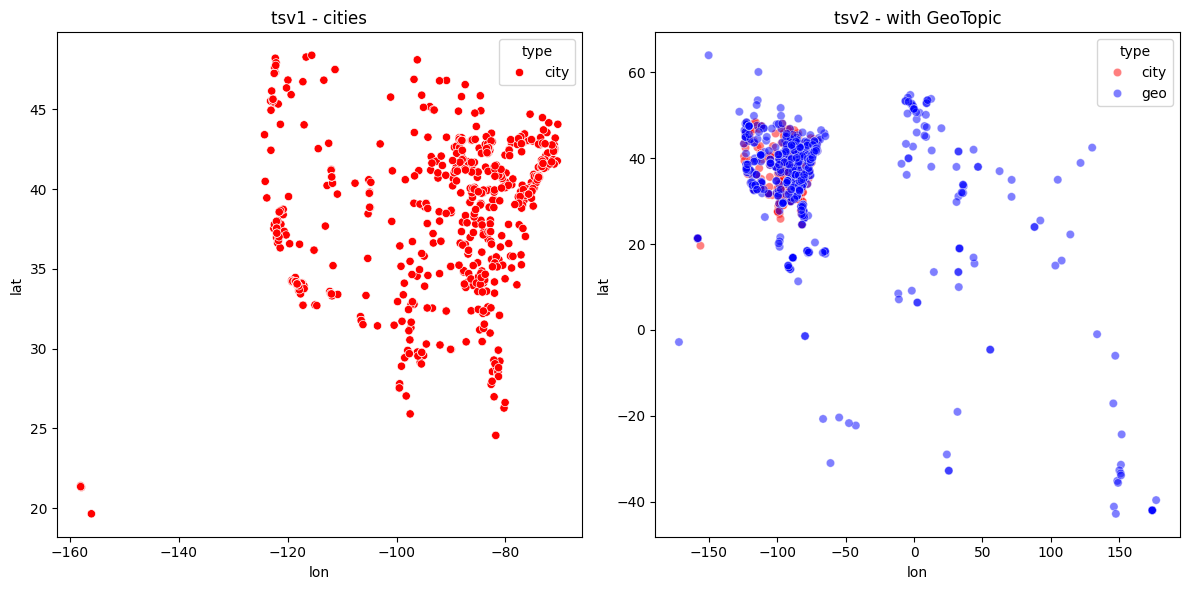

In [55]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

plot_df = tsv2_geo.dropna(subset=['geo_name','geo_lat','geo_lon'],how='all')
plot_df = plot_df[['city','city_longitude','city_latitude','geo_name','geo_lat','geo_lon']]

# Reshape the data
city_df = plot_df[['city_longitude', 'city_latitude']].copy()
city_df.columns = ['lon', 'lat']
city_df['type'] = 'city'

geo_df = plot_df[['geo_lon', 'geo_lat']].copy()
geo_df.columns = ['lon', 'lat']
geo_df['type'] = 'geo'

combined_df = pd.concat([city_df, geo_df], ignore_index=True)

# Plot
## subplots
fig, axes = plt.subplots(1, 2, figsize=(12,6)) 
sb.scatterplot(data=city_df, x='lon', y='lat', hue='type', palette={'city':'red'}, ax=axes[0])
axes[0].set_title("tsv1 - cities")

sb.scatterplot(data=combined_df, x='lon', y='lat', hue='type', palette={'city': 'red', 'geo': 'blue'}, alpha=0.5, ax=axes[1])
axes[1].set_title("tsv2 - with GeoTopic")

plt.tight_layout()
plt.show()

/tmp/ipykernel_9279/2077031983.py:3: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  g = sb.jointplot(data=plot_df[['city_longitude','city_latitude']],x='city_longitude', y='city_latitude', kind='scatter', ax=axes[0])


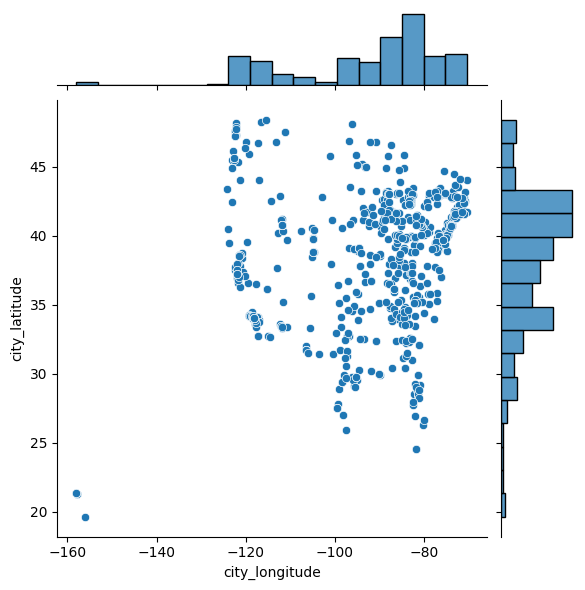

In [78]:
# JointGrid plot 
import seaborn as sb 
g = sb.jointplot(data=plot_df[['city_longitude','city_latitude']],x='city_longitude', y='city_latitude', kind='scatter', ax=axes[0])

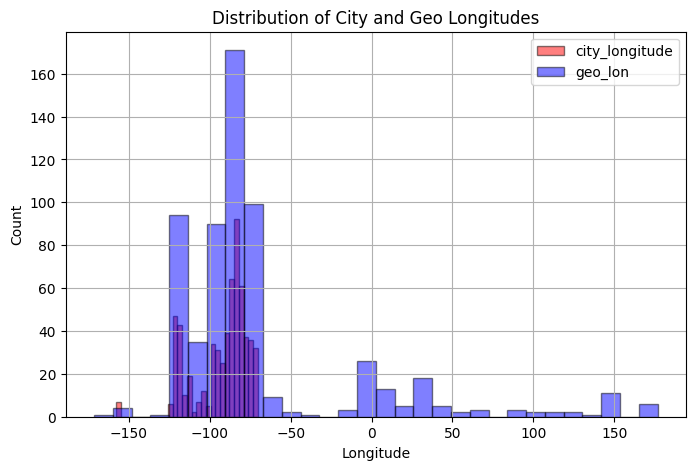

In [76]:
# Histogram of location alongside longitude(South to North)
plt.figure(figsize=(8, 5))
plt.hist(plot_df['city_longitude'], bins=30, alpha=0.5, label='city_longitude', color='red', edgecolor='black')
plt.hist(plot_df['geo_lon'], bins=30, alpha=0.5, label='geo_lon', color='blue', edgecolor='black')
plt.xlabel('Longitude')
plt.ylabel('Count')
plt.title('Distribution of City and Geo Longitudes')
plt.legend()
plt.grid(True)
plt.show()


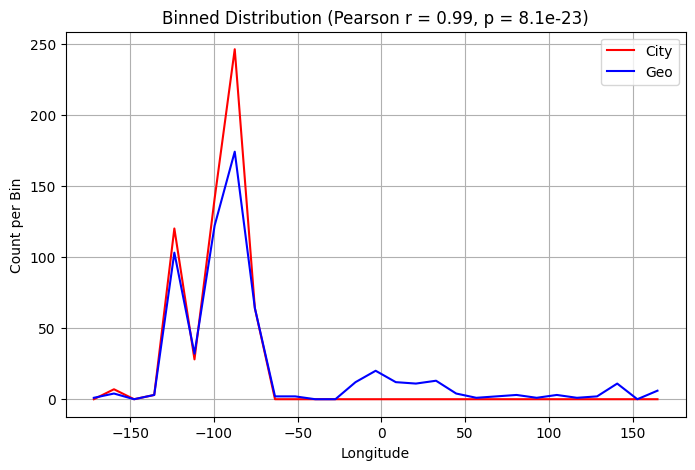

In [75]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# 1. Define bins
bins = np.linspace(min(plot_df[['city_longitude', 'geo_lon']].min()),
                   max(plot_df[['city_longitude', 'geo_lon']].max()), 30)

# 2. Histogram counts
city_hist, _ = np.histogram(plot_df['city_longitude'], bins=bins)
geo_hist, _ = np.histogram(plot_df['geo_lon'], bins=bins)

# 3. Compute correlation
corr, pval = pearsonr(city_hist, geo_hist)

# 4. (Optional) Plot both histograms
plt.figure(figsize=(8, 5))
plt.plot(bins[:-1], city_hist, label='City', color='red')
plt.plot(bins[:-1], geo_hist, label='Geo', color='blue')
plt.xlabel('Longitude')
plt.ylabel('Count per Bin')
plt.title(f'Binned Distribution (Pearson r = {corr:.2f}, p = {pval:.2g})')
plt.legend()
plt.grid(True)
plt.show()


In [77]:
import numpy as np
import pandas as pd

# Define shared bins (e.g., 30 equally spaced bins across all longitudes)
bins = np.linspace(
    min(plot_df[['city_longitude', 'geo_lon']].min()),
    max(plot_df[['city_longitude', 'geo_lon']].max()),
    30
)

# Histogram counts
city_hist, _ = np.histogram(plot_df['city_longitude'], bins=bins)
geo_hist, _ = np.histogram(plot_df['geo_lon'], bins=bins)

# Bin centers (for interpretation)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Function to compute average, median, and most frequent bin center
def histogram_stats(hist_counts, bin_centers):
    total = hist_counts.sum()
    # Weighted average
    avg = np.sum(hist_counts * bin_centers) / total
    # Cumulonive sum for median
    cum_counts = np.cumsum(hist_counts)
    median_bin_idx = np.searchsorted(cum_counts, total / 2)
    median = bin_centers[median_bin_idx]
    # Most frequent bin
    max_bin_idx = np.argmax(hist_counts)
    mode = bin_centers[max_bin_idx]
    return avg, median, mode

# Get stats
city_avg, city_median, city_mode = histogram_stats(city_hist, bin_centers)
geo_avg, geo_median, geo_mode = histogram_stats(geo_hist, bin_centers)

# Print nicely
print(f"City longitude Stats:")
print(f"  Average: {city_avg:.4f}")
print(f"  Median:  {city_median:.4f}")
print(f"  Mode:    {city_mode:.4f} (Most frequent bin center)")

print(f"\nGeo longitude Stats:")
print(f"  Average: {geo_avg:.4f}")
print(f"  Median:  {geo_median:.4f}")
print(f"  Mode:    {geo_mode:.4f} (Most frequent bin center)")


City longitude Stats:
  Average: -92.3361
  Median:  -81.5414
  Mode:    -81.5414 (Most frequent bin center)

Geo longitude Stats:
  Average: -68.7536
  Median:  -81.5414
  Mode:    -81.5414 (Most frequent bin center)


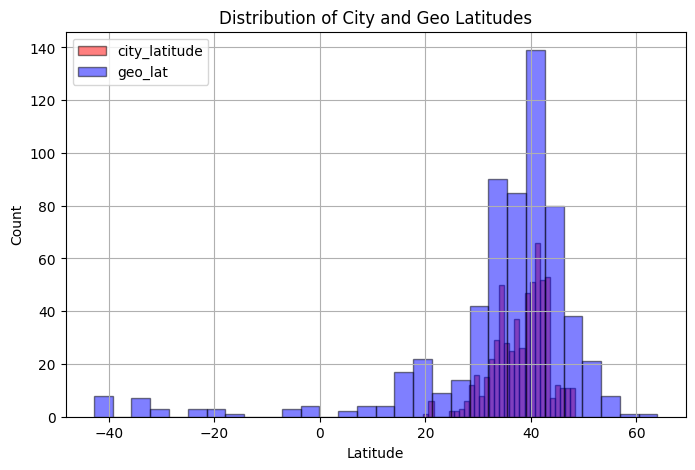

In [ ]:
# Histogram of location alongside latitude
plt.figure(figsize=(8, 5))
plt.hist(plot_df['city_latitude'], bins=30, alpha=0.5, label='city_latitude', color='red', edgecolor='black')
plt.hist(plot_df['geo_lat'].dropna(), bins=30, alpha=0.5, label='geo_lat', color='blue', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Count')
plt.title('Distribution of City and Geo Latitudes')
plt.legend()
plt.grid(True)
plt.show()


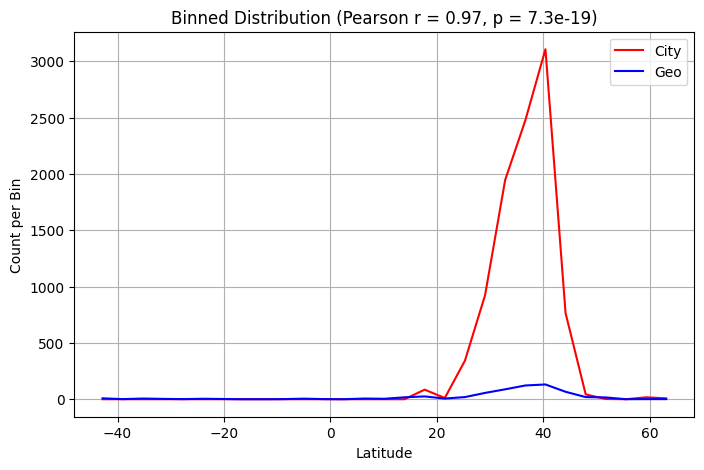

In [67]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# 1. Define bins
bins = np.linspace(min(plot_df[['city_latitude', 'geo_lat']].min()),
                   max(plot_df[['city_latitude', 'geo_lat']].max()), 30)

# 2. Histogram counts
city_hist, _ = np.histogram(plot_df['city_latitude'], bins=bins)
geo_hist, _ = np.histogram(plot_df['geo_lat'], bins=bins)

# 3. Compute correlation
corr, pval = pearsonr(city_hist, geo_hist)

# 4. (Optional) Plot both histograms
plt.figure(figsize=(8, 5))
plt.plot(bins[:-1], city_hist, label='City', color='red')
plt.plot(bins[:-1], geo_hist, label='Geo', color='blue')
plt.xlabel('Latitude')
plt.ylabel('Count per Bin')
plt.title(f'Binned Distribution (Pearson r = {corr:.2f}, p = {pval:.2g})')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
import numpy as np
import pandas as pd

# Define shared bins (e.g., 30 equally spaced bins across all latitudes)
bins = np.linspace(
    min(plot_df[['city_latitude', 'geo_lat']].min()),
    max(plot_df[['city_latitude', 'geo_lat']].max()),
    30
)

# Histogram counts
city_hist, _ = np.histogram(plot_df['city_latitude'], bins=bins)
geo_hist, _ = np.histogram(plot_df['geo_lat'], bins=bins)

# Bin centers (for interpretation)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Function to compute average, median, and most frequent bin center
def histogram_stats(hist_counts, bin_centers):
    total = hist_counts.sum()
    # Weighted average
    avg = np.sum(hist_counts * bin_centers) / total
    # Cumulative sum for median
    cum_counts = np.cumsum(hist_counts)
    median_bin_idx = np.searchsorted(cum_counts, total / 2)
    median = bin_centers[median_bin_idx]
    # Most frequent bin
    max_bin_idx = np.argmax(hist_counts)
    mode = bin_centers[max_bin_idx]
    return avg, median, mode

# Get stats
city_avg, city_median, city_mode = histogram_stats(city_hist, bin_centers)
geo_avg, geo_median, geo_mode = histogram_stats(geo_hist, bin_centers)

# Print nicely
print(f"City Latitude Stats:")
print(f"  Average: {city_avg:.4f}")
print(f"  Median:  {city_median:.4f}")
print(f"  Mode:    {city_mode:.4f} (Most frequent bin center)")

print(f"\nGeo Latitude Stats:")
print(f"  Average: {geo_avg:.4f}")
print(f"  Median:  {geo_median:.4f}")
print(f"  Mode:    {geo_mode:.4f} (Most frequent bin center)")


City Latitude Stats:
  Average: 38.0437
  Median:  40.0578
  Mode:    40.0578 (Most frequent bin center)

Geo Latitude Stats:
  Average: 33.9127
  Median:  40.0578
  Mode:    40.0578 (Most frequent bin center)


In [56]:
# The number of Exactly identical location names 

filter_1 = (tsv2_geo['location']==tsv2_geo['geo_name'])
filter_2 = (tsv2_geo['longitude'].apply(lambda x: round(float(x),1))==tsv2_geo['geo_lon'].apply(lambda x: round(float(x),1)))&(tsv2_geo['latitude'].apply(lambda x: round(float(x),1))==tsv2_geo['geo_lat'].apply(lambda x: round(float(x),1)))
print(len(tsv2_geo[filter_1]))
print(len(tsv2_geo[filter_1 & filter_2]))

14
1


In [57]:
print(len(tsv2_geo))
print(len(plot_df))

9735
609


In [63]:
import numpy as np

# Step 1: Compute lat/lon degree threshold
km_range = 10
lat_km_per_deg = 111  # approximately constant
plot_df = tsv2_geo.dropna(subset=['geo_name','geo_lat','geo_lon'],how='all')
print("The number of non-NA GeoTopicParser records:", len(plot_df))

# Latitude difference (same for all rows)
lat_diff = km_range / lat_km_per_deg  # ≈ 0.0901

# Longitude difference (depends on latitude)
# Compute longitude difference per row
plot_df['lon_diff'] = km_range / (lat_km_per_deg * np.cos(np.radians(plot_df['city_latitude'])))

# Step 2: Compute boolean mask of points within 10 km square box
within_lat = np.abs(plot_df['geo_lat'] - plot_df['city_latitude']) <= lat_diff
within_lon = np.abs(plot_df['geo_lon'] - plot_df['city_longitude']) <= plot_df['lon_diff']
within_box = within_lat & within_lon

# Step 3: Keep only records **outside** the 10 km box
filtered_df = plot_df[~within_box].copy()
print("The number of records:",len(filtered_df))
filtered_df 

The number of non-NA GeoTopicParser records: 609
The number of records: 519


/tmp/ipykernel_9279/1468048841.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['lon_diff'] = km_range / (lat_km_per_deg * np.cos(np.radians(plot_df['city_latitude'])))


,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude,...,interstate_gaspipe_within_10miles,mental_health_provider,mental_health_RGB,IMG_LOC,caption,objects,geo_name,geo_lat,geo_lon,lon_diff
13,Ann Arbor,United States,Mercywood was a mental hospital before closing...,Mercywood Hospital,Michigan,MI,-83.654159,42.264880,-83.743038,42.280826,...,False,677.0,"(np.int64(187), np.int64(204), np.int64(199))",../data/Images/image_13.png,a black and white photo of a train station .,"prison, prison house",Parish of Saint Ann,18.35000,-77.26667,0.121767
40,Brighton,United States,before the death sentence was revoked in Michi...,Brighton Women's correctional institute,Michigan,MI,-83.695428,42.519123,-83.780221,42.529477,...,False,677.0,"(np.int64(187), np.int64(204), np.int64(199))",../data/Images/image_40.png,a group of men standing next to each other .,"academic gown, academic robe, judge's robe, ba...",Michigan,44.25029,-85.50033,0.122251
55,Charlotte,United States,people say that in the Charlotte Jr. High the ...,Old Charlotte Jr. High,Michigan,MI,-84.856486,42.555699,-84.835821,42.563648,...,False,677.0,"(np.int64(187), np.int64(204), np.int64(199))",../data/Images/image_55.png,a group of people standing next to each other .,"web site, website, internet site, site, laptop...",Charlotte Amalie,18.34190,-64.93070,0.122318
60,Clarkston,United States,Closed Down- Sightings of people around the ci...,Clarkston Cinema,Michigan,MI,-83.434150,42.660509,-83.419294,42.735120,...,False,677.0,"(np.int64(187), np.int64(204), np.int64(199))",../data/Images/image_60.png,a living room filled with furniture and a flat...,"home theater, home theatre, cinema, movie thea...",Little Rock,34.74648,-92.28959,0.122655
100,Detroit,United States,before the Tunnel to Canada - A little girl wa...,Jefferson St.,Michigan,MI,-83.008845,42.345696,-83.045754,42.331427,...,False,677.0,"(np.int64(187), np.int64(204), np.int64(199))",../data/Images/image_100.png,a black and white photo of a city street,"cab, hack, taxi, taxicab, minivan",Tunnel City,44.00719,-90.56569,0.121865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9634,Commerce City,United States,The barn is located on a dirt road the runs be...,The Barn,Colorado,CO,-104.942366,39.811725,-104.933868,39.808320,...,False,457.0,"(np.int64(139), np.int64(197), np.int64(196))",../data/Images/image_9630.png,a black and white photo of a barn and a barn,barn,Rocky Mountain House Airport,52.42972,-114.90417,0.117276
9653,Denver,United States,Dunklee Hall - was located at the intersection...,University of Denver Lamont School of Music,Colorado,CO,-104.959968,39.674223,-104.990251,39.739236,...,False,457.0,"(np.int64(139), np.int64(197), np.int64(196))",../data/Images/image_9649.png,a large building with a clock on the top .,"library, tile roof",Montview,36.14014,-80.23644,0.117158
9675,Fort Collins,United States,On the third floor a worker claims ghosts woul...,Helmshire Inn,Colorado,CO,-105.072713,40.539291,-105.084423,40.585260,...,False,457.0,"(np.int64(139), np.int64(197), np.int64(196))",../data/Images/image_9671.png,a black and white photo of an old building .,"prison, prison house",Legacy Park,27.92090,-82.34680,0.118627
9686,Greeley,United States,The hotel was built where the old Chief Theatr...,The Ramkota Hotel,Colorado,CO,-104.690043,40.425027,-104.709132,40.423314,...,False,457.0,"(np.int64(139), np.int64(197), np.int64(196))",../data/Images/image_9682.png,a large building with a large clock on it .,"cinema, movie theater, movie theatre, movie ho...",Republic of Seychelles,-4.58333,55.66667,0.118341
